In [1]:
import pandas as pd

In [2]:
#read CSV file directly from a URL and save the response
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)
#display first five tuples. Note that the data variable contains bothe feature and response values.
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
#display last five tuples
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [4]:
data.shape

(200, 4)

In [5]:
import seaborn as sns
#To view the plots inline
%matplotlib inline

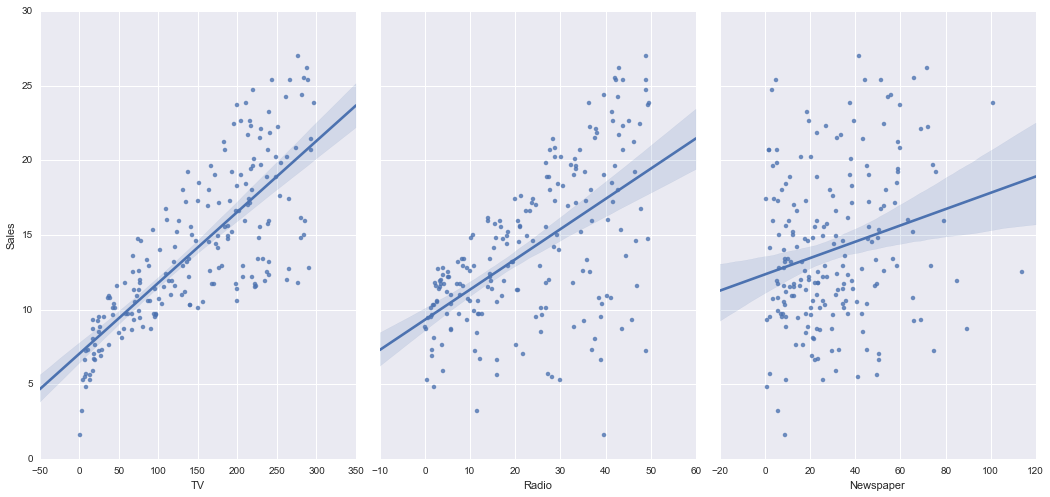

In [6]:
sns.pairplot(data, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', size = 7, aspect = 0.7, kind = 'reg')

In [7]:
#Save the feature values in X
X = data[['TV', 'Radio', 'Newspaper']]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
print type(X)
X.shape

<class 'pandas.core.frame.DataFrame'>


(200, 3)

In [10]:
#Save the response values in y
y = data['Sales']

print type(y)
y.shape

<class 'pandas.core.series.Series'>


(200L,)

In [11]:
#Train-test split is done to divide the dataset into two sets. One to be used for training purpose and other for testing purpose.
#Normally we keep 70%-80% data for training purpose and remaining for testing purpose
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1) #setting random state variable would give same train-test pair each time.

In [12]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(150, 3)
(150L,)
(50, 3)
(50L,)


In [13]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
feature_cols = ['TV', 'Radio', 'Newspaper']
print linreg.intercept_
print linreg.coef_
zip(feature_cols, linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


[('TV', 0.046564567874150246),
 ('Radio', 0.17915812245088861),
 ('Newspaper', 0.0034504647111804759)]

In [16]:
y_pred = linreg.predict(X_test)
print y_pred

[ 21.70910292  16.41055243   7.60955058  17.80769552  18.6146359
  23.83573998  16.32488681  13.43225536   9.17173403  17.333853
  14.44479482   9.83511973  17.18797614  16.73086831  15.05529391
  15.61434433  12.42541574  17.17716376  11.08827566  18.00537501
   9.28438889  12.98458458   8.79950614  10.42382499  11.3846456
  14.98082512   9.78853268  19.39643187  18.18099936  17.12807566
  21.54670213  14.69809481  16.24641438  12.32114579  19.92422501
  15.32498602  13.88726522  10.03162255  20.93105915   7.44936831
   3.64695761   7.22020178   5.9962782   18.43381853   8.39408045
  14.08371047  15.02195699  20.35836418  20.57036347  19.60636679]


##Error Analysis

In [17]:
#calculaing Mean Absolute Error(MAE)
from sklearn import metrics
print metrics.mean_absolute_error(y_pred, y_test)

1.06689170826


In [18]:
#Calculating Mean Squared Error(MSE)
print metrics.mean_squared_error(y_test, y_pred)

1.97304562023


In [19]:
#Calculating Root Mean Squared Error(RMSE) 
#We square root the mean square error, since there is no separatefunction for RMSE
import numpy as np
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.40465142303
